In [39]:
# Import libraries
import pandas as pd
import numpy as np 

import string
from collections import defaultdict

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\egust\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [2]:
df_train = pd.read_csv('train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [3]:
print('There are {} rows and {} columns in this train dataset.'.format(df_train.shape[0],df_train.shape[1]))

There are 7613 rows and 5 columns in this train dataset.


## EDA

In [4]:
# Find the instance difference in the target class
print('This train set contains {} instance of no disaster target'.format(len(df_train.loc[df_train['target'] == 0])))
print('This train set contains {} instance of disaster target'.format(len(df_train.loc[df_train['target'] == 1])))

This train set contains 4342 instance of no disaster target
This train set contains 3271 instance of disaster target


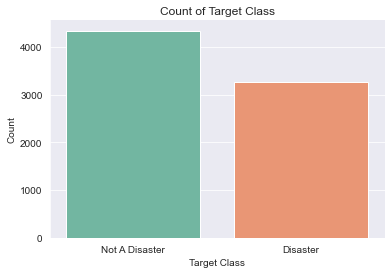

In [5]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

plot = sns.countplot(data=df_train, x='target')
plt.title('Count of Target Class')
plt.xlabel('Target Class')
plt.ylabel('Count')
plot.set_xticklabels(['Not A Disaster', 'Disaster'])

sns.despine()
plt.show()

In [6]:
# Creating a new feature to determine the length of a text
def textlength(text):
    """A function to determine the length of text"""
    return len(text)

In [7]:
df_train['length_txt'] = df_train['text'].apply(textlength)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7613 non-null   int64 
 1   keyword     7552 non-null   object
 2   location    5080 non-null   object
 3   text        7613 non-null   object
 4   target      7613 non-null   int64 
 5   length_txt  7613 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 357.0+ KB


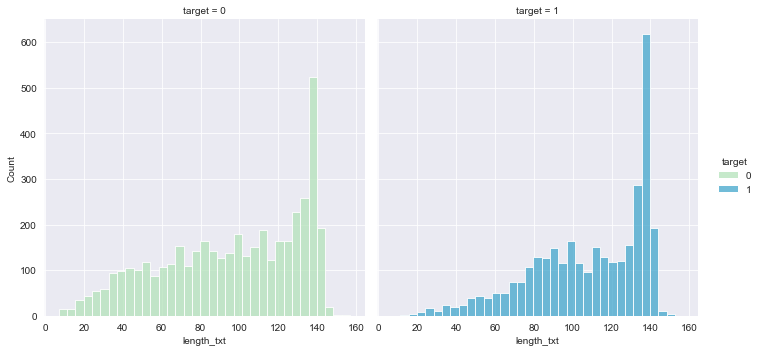

In [8]:
# Finding the distribution of text length between target class
sns.displot(data=df_train, x='length_txt', bins=35, hue='target', col='target', palette='GnBu')

In [9]:
# This is showing me that the length of text is not a great feature to seperate the classes.
# However, there are more smaller length text that show that there is no disaster. 

In [10]:
def word_count(text):
    """Count the amount of words in a text"""
    return len(text.split())

In [11]:
df_train['word_count'] = df_train['text'].apply(word_count)

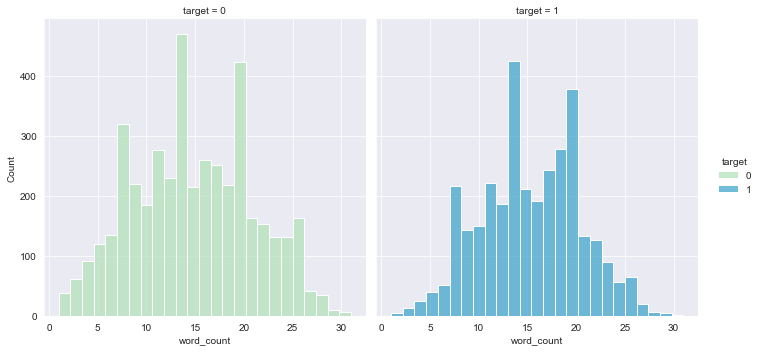

In [12]:
# Finding the distribution of text length between target class
sns.displot(data=df_train, x='word_count', bins=25, hue='target', col='target', palette='GnBu')

In [13]:
# The next step to my process is examining the puncuation for each target class
# 1. Create a corpus function to make a corpus for each target.
# 2. Find which puncuation is important for each target, demonstrate with a visual

def create_corpus(target):
    corpus = []
    
    for x in df_train[df_train.target == target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [14]:
# Remove '-' & from the analysis

In [17]:
def dic_punctuation(target):
    corpus= create_corpus(target)
    
    dic=defaultdict(int)
    special = string.punctuation
    for word in corpus:
        if word in special:
            dic[word]+=1
    # Remove '-' from the analysis
    del dic['-']
    
    sorted_tuples = sorted(dic.items(), key= lambda item:item[1])
    dic = {k: v for k, v in sorted_tuples}
    
    return dic

Text(0.5, 1.0, 'Punctuations for a Disaster')

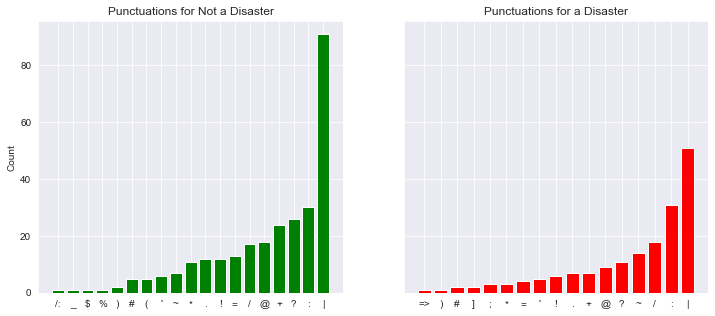

In [31]:
dic = dic_punctuation(0)
x, y=zip(*dic.items())

dic1 = dic_punctuation(1)
x1, y1=zip(*dic1.items())

fig, (axe1, axe2)= plt.subplots(1,2,sharey=True, figsize=(12,5))
axe1.bar(x,y,color='g')
axe1.set_title('Punctuations for Not a Disaster')
axe1.set_ylabel('Count')

axe2.bar(x1,y1,color='r')
axe2.set_title('Punctuations for a Disaster')


In [32]:
# I dont see any important difference and the amount of punctuations relative to the sample size for each target is less
# than 2%. Moving forward I will remove all the punctuations.

In [35]:
# Removing punctuations
df_train.head()

,id,keyword,location,text,target,length_txt,word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16


In [40]:
def sent_token(text):
    """Performs a sentence tokenization"""
    return sent_tokenize(text)
def word_token(text):
    """Performs a word Tokenization"""
    return word_tokenize(text)

df_train['sent_tokens'] = df_train['text'].apply(sent_token)
df_train['sent_tokens_len'] = df_train['sent_tokens'].apply(textlength)

df_train['word_tokens'] = df_train['text'].apply(word_token)
df_train['word_tokens_len'] = df_train['word_tokens'].apply(textlength)

df_train.head()

,id,keyword,location,text,target,length_txt,word_count,sent_tokens,word_tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,[Our Deeds are the Reason of this #earthquake ...,"[Our, Deeds, are, the, Reason, of, this, #, ea..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,"[Forest fire near La Ronge Sask., Canada]","[Forest, fire, near, La, Ronge, Sask, ., Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,[All residents asked to 'shelter in place' are...,"[All, residents, asked, to, 'shelter, in, plac..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,"[13,000 people receive #wildfires evacuation o...","[13,000, people, receive, #, wildfires, evacua..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,[Just got sent this photo from Ruby #Alaska as...,"[Just, got, sent, this, photo, from, Ruby, #, ..."
